In [355]:
import seaborn as sns

from matplotlib import pyplot

import statistics

from statistics import mean

import pandas as pd

import re

In [147]:
df_sport = pd.read_csv('sport_preprocessed.csv')

In [148]:
df_sport.head()

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month,avg_month,sport_ticks_this_month
0,2020-12-19,Aidan Shelburne,12,2020-12,Male,21.0,5.11b,TR,NaN,1.0,5.11a,5.11d,15.0,15.0,15.00,1
1,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,5.11a,5.11d,14.0,14.0,11.75,4
2,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10a,Lead,NaN,1.0,5.11a,5.11d,10.0,14.0,11.75,4
3,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.75,4
4,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.75,4


In [149]:
def numerical_difficulty(row):
    """
    Integer to represent general climbing difficulty.
    """
    #if type(row) == str:
    grade = str(row)
    if (re.search('5.15d', grade)):
        difficulty = 33
    elif (re.search('5.15c', grade)):
        difficulty = 32      
    elif (re.search('5.15b', grade)):
        difficulty = 31
    elif (re.search('5.15a', grade)):
        difficulty = 30
    elif (re.search('5.15\\+', grade)):
        difficulty = 32.5
    elif (re.search('5.15\\-', grade)):
        difficulty = 30.5
    elif (re.search('5.15', grade)):
        difficulty = 31.5 
          
    elif (re.search('5.14d', grade)):
        difficulty = 29
    elif (re.search('5.14c', grade)):
        difficulty = 28
    elif (re.search('5.14b', grade)):
        difficulty = 27
    elif (re.search('5.14a', grade)):
        difficulty = 26
    elif (re.search('5.14\\+', grade)):
        difficulty = 28.5  
    elif (re.search('5.14\\-', grade)):
        difficulty = 26.5 
    elif (re.search('5.14', grade)):
        difficulty = 27.5 
          
    elif (re.search('5.13d', grade)):
        difficulty = 25
    elif (re.search('5.13c', grade)):
        difficulty = 24
    elif (re.search('5.13b', grade)):
        difficulty = 23
    elif (re.search('5.13a', grade)):
        difficulty = 22
    elif (re.search('5.13\\+', grade)):
        difficulty = 24.5  
    elif (re.search('5.13\\-', grade)):
        difficulty = 22.5  
    elif (re.search('5.13', grade)):
        difficulty = 23.5
          
    elif (re.search('5.12d', grade)):
        difficulty = 21
    elif (re.search('5.12c', grade)):
        difficulty = 20
    elif (re.search('5.12b', grade)):
        difficulty = 19
    elif (re.search('5.12a', grade)):
        difficulty = 18
    elif (re.search('5.12\\+', grade)):
        difficulty = 20.5
    elif (re.search('5.12\\-', grade)):
        difficulty = 18.5
    elif (re.search('5.12', grade)):
        difficulty =  19.5
          
    elif (re.search('5.11d', grade)):
        difficulty = 17
    elif (re.search('5.11c', grade)):
        difficulty = 16
    elif (re.search('5.11b', grade)):
        difficulty = 15
    elif (re.search('5.11a', grade)):
        difficulty = 14
    elif (re.search('5.11\\+', grade)):
        difficulty = 16.5
    elif (re.search('5.11\\-', grade)):
        difficulty = 14.5
    elif (re.search('5.11', grade)):
        difficulty =  15.5

    elif (re.search('5.10d', grade)):
        difficulty = 13
    elif (re.search('5.10c', grade)):
        difficulty = 12
    elif (re.search('5.10b', grade)):
        difficulty = 11
    elif (re.search('5.10a', grade)):
        difficulty = 10
    elif (re.search('5.10\\-', grade)):
        difficulty = 10.5 
    elif (re.search('5.10\\+', grade)):
        difficulty = 12.5 
    elif (re.search('5.10', grade)):
        difficulty =  11.5

          
    elif (re.search('5.9', grade)):
        difficulty = 9 
    elif (re.search('5.8', grade)):
        difficulty = 8           
    elif (re.search('5.7', grade)):
        difficulty = 7           
    elif (re.search('5.6', grade)):
        difficulty = 6    
    elif (re.search('5.5', grade)):
        difficulty = 5           
    elif (re.search('5.4', grade)):
        difficulty = 4         
    elif (re.search('5.3', grade)):
        difficulty = 3           
    elif (re.search('5.2', grade)):
        difficulty = 2           
    elif (re.search('5.1', grade)):
        difficulty = 1           
    elif (re.search('5.0', grade)):
        difficulty = .8          
    elif (re.search('5th', grade)):
        difficulty = .6          
    elif (re.search('4th', grade)):
        difficulty = .4           
    elif (re.search('3rd', grade)):
        difficulty = .2 
    else: 
          difficulty = 0
    return difficulty


In [150]:
df_sport['numerical_lead'] = df_sport['Sport Leads'].apply(lambda row: numerical_difficulty(row))


In [151]:
df_sport['numerical_follow'] = df_sport['Sport Follows'].apply(lambda row: numerical_difficulty(row))


In [152]:
df_sport.sample(5)

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month,avg_month,sport_ticks_this_month,numerical_lead,numerical_follow
214838,2014-11-17,Steve Wheeler,11,2014-11,Male,33.0,5.9,NaN,NaN,1.0,5.12c,5.12c,9.0,18.0,11.530928,97,20.0,20.0
169570,2011-05-23,C Hopwood,5,2011-05,Male,33.0,5.9+,NaN,NaN,1.0,5.13a,5.13a,9.0,15.0,10.517857,28,22.0,22.0
113022,2020-05-23,Tommy Paz,5,2020-05,Male,26.0,5.7,Lead,NaN,1.0,5.10d,5.10d,7.0,14.0,8.555556,18,13.0,13.0
210773,2017-07-01,Jake Tomlitz,7,2017-07,Male,31.0,5.10d,TR,NaN,1.0,5.12a,5.12b,13.0,13.0,9.000000,5,18.0,19.0
185168,2014-04-08,Aaron Shields,4,2014-04,Male,36.0,5.10a,NaN,NaN,1.0,5.10d,5.11b,10.0,10.0,7.666667,3,13.0,15.0


In [153]:
df_sport.dtypes

Date                       object
Name                       object
Month                       int64
month_year                 object
Gender                     object
Age                       float64
Rating                     object
Style                      object
Lead Style                 object
Pitches                   float64
Sport Leads                object
Sport Follows              object
numerical_difficulty      float64
max_month                 float64
avg_month                 float64
sport_ticks_this_month      int64
numerical_lead            float64
numerical_follow          float64
dtype: object

In [154]:
df_sport.numerical_lead.head(20)

0     14.0
1     14.0
2     14.0
3     14.0
4     14.0
5     14.0
6     14.0
7     14.0
8     14.0
9     14.0
10    14.0
11    20.0
12    20.0
13    20.0
14    20.0
15    20.0
16    20.0
17    20.0
18    20.0
19    20.0
Name: numerical_lead, dtype: float64

In [155]:
# Remove difficulties that are 'unknown', defined as 0 in my function.
df_sport = df_sport[df_sport['numerical_lead'] > 0]

In [156]:
df_sport.numerical_lead.head(5)

0    14.0
1    14.0
2    14.0
3    14.0
4    14.0
Name: numerical_lead, dtype: float64

In [157]:
df_sport.numerical_lead.unique()

array([14. , 20. , 24. ,  9. , 11. , 18. ,  0.4, 16. ,  0.2, 10. , 13. ,
       21. , 22. , 19. , 12. , 17. , 15. , 23. ,  7. ,  8. ,  4. ,  6. ,
        0.8, 26. , 28. , 27. , 25. ,  2. , 29. ,  5. , 33. ,  1. ,  3. ])

# Men

In [158]:
# Make a df of just males
df_male = df_sport[df_sport['Gender'] == 'Male']

In [159]:
# Make a df of just male users with their lead ticks
df_male_lead = df_male[df_male['Style'] == 'Lead']

In [160]:
df_male_lead.shape

(91421, 18)

In [161]:
# Get a list of the unique names
names = df_male_lead.Name.unique()

In [162]:
# Number of unique names
len(names)

1888

In [163]:
# Make a list of the number of ticks for each user that are above what they claim they can lead climb.
count_above_lead = []
for name in names:
    df_male_lead[df_male_lead.Name == name]
    count_above_lead.append(len(df_male_lead[(df_male_lead.Name == name) & (df_male_lead.numerical_difficulty >= df_male_lead.numerical_lead)]['numerical_difficulty']))
    


In [166]:
# Find the average number of lead climbing ticks someone has that are at or above 
# what they claim to lead climb.
mean(count_above_lead)

8.458686440677965

In [167]:
statistics.stdev(count_above_lead)

28.826866347088167

## By Grade

In [412]:
# Get a list of the unique names
names = df_male_lead.Name.unique()

# Get the list of unique grades
the_leads = df_male_lead['Sport Leads'].unique()

lead_dict_full = {}
lead_dict = {}
for lead_grade in the_leads:
    count_above_lead = []
    for name in names:
        if len(df_male_lead[(df_male_lead.Name == name) & (df_male_lead['Sport Leads'] == lead_grade)]) == 0:
            x=0
        else:
            count_above_lead.append(len(df_male_lead[(df_male_lead.Name == name) & 
                                                       (df_male_lead['Sport Leads'] == lead_grade) &
                                                       (df_male_lead.numerical_difficulty >= df_male_lead.numerical_lead)]['numerical_difficulty']))
    lead_dict_full[lead_grade] = count_above_lead
    lead_dict[lead_grade] = mean(count_above_lead)

In [417]:
lead_dict_count = lead_dict_full.copy()

In [418]:
for key in lead_dict_count:
    lead_dict_count[key] = len(lead_dict_count[key])

In [420]:
lead_dict_count_men = lead_dict_count.copy()

In [241]:
lead_dict

{' 5.11a': 6.961538461538462,
 ' 5.12c': 6.883333333333334,
 ' 5.13c': 0.375,
 ' 5.12a': 7.581818181818182,
 ' 4th': 100,
 ' 5.11c': 4.733870967741935,
 ' 5.10b': 4.60431654676259,
 ' 5.10a': 6.757009345794392,
 ' 5.10d': 8.120567375886525,
 ' 5.12d': 8.642857142857142,
 ' 5.13a': 5.24,
 ' 5.12b': 6.561643835616438,
 ' 5.11d': 3.4404761904761907,
 ' 5.11b': 5.636363636363637,
 ' 5.10c': 4,
 ' 5.9': 6.723076923076923,
 ' 5.7': 33.2,
 ' 5.8': 5.546666666666667,
 ' 5.6': 8.833333333333334,
 ' 5.0': 12.875,
 ' 3rd': 53.61904761904762,
 ' 5.14a': 1.25,
 ' 5.14b': 0,
 ' 5.13b': 3.25,
 ' 5.13d': 0,
 ' 5.2': 129.5,
 ' 5.14d': 0,
 ' 5.4': 10,
 ' 5.5': 41.666666666666664,
 ' 5.1': 9,
 ' 5.3': 4}

In [242]:
men_lead_dict = lead_dict

# Women

In [168]:
# df of just women
df_female = df_sport[df_sport['Gender'] == 'Female']

In [169]:
# df of women lead ticks
df_female_lead = df_female[df_female['Style'] == 'Lead']

In [170]:
df_female_lead.shape

(19132, 18)

In [171]:
# Total number of women
names = df_female_lead.Name.unique()
len(names)

In [173]:
names = df_female_lead.Name.unique()

count_above_lead = []
for name in names:
    df_female_lead[df_female_lead.Name == name]
    count_above_lead.append(len(df_female_lead[(df_female_lead.Name == name) & (df_female_lead.numerical_difficulty >= df_female_lead.numerical_lead)]['numerical_difficulty']))

In [174]:
mean(count_above_lead)

8.861771058315334

In [175]:
statistics.stdev(count_above_lead)

19.015324951305704

## By grade

In [247]:
# Unique difficulty levels
the_leads = df_female_lead['Sport Leads'].unique()

In [421]:
# Make a dictionary where the keys are the difficulty levels and the keys are the average count of  
# ticks of that grade or above from women who claim to climb that grade.
names = df_female_lead.Name.unique()
the_leads = df_female_lead['Sport Leads'].unique()

lead_dict_full = {}
lead_dict = {}
for lead_grade in the_leads:
    count_above_lead = []
    for name in names:
        if len(df_female_lead[(df_female_lead.Name == name) & (df_female_lead['Sport Leads'] == lead_grade)]) == 0:
            x=0
        else:
            count_above_lead.append(len(df_female_lead[(df_female_lead.Name == name) & 
                                                       (df_female_lead['Sport Leads'] == lead_grade) &
                                                       (df_female_lead.numerical_difficulty >= df_female_lead.numerical_lead)]['numerical_difficulty']))
    lead_dict_full[lead_grade] = count_above_lead
    lead_dict[lead_grade] = mean(count_above_lead)

In [422]:
lead_dict_count = lead_dict_full.copy()

In [423]:
for key in lead_dict_count:
    lead_dict_count[key] = len(lead_dict_count[key])

In [424]:
lead_dict_count_women = lead_dict_count.copy()

In [253]:
lead_dict

{' 5.10b': 7.25,
 ' 5.12c': 9.833333333333334,
 ' 3rd': 12.6,
 ' 5.9': 6.467532467532467,
 ' 5.10c': 7.314285714285714,
 ' 5.10a': 11.85483870967742,
 ' 5.11a': 15.634146341463415,
 ' 5.11c': 13.31578947368421,
 ' 5.13a': 2.6666666666666665,
 ' 5.12a': 9.48,
 ' 5.12b': 4.461538461538462,
 ' 5.10d': 6.857142857142857,
 ' 5.11b': 5.6521739130434785,
 ' 5.7': 6.363636363636363,
 ' 5.8': 4.421052631578948,
 ' 5.12d': 12,
 ' 5.11d': 16.4,
 ' 5.4': 8,
 ' 5.0': 76,
 ' 5.13b': 0.5,
 ' 5.6': 6.333333333333333,
 ' 5.5': 3,
 ' 5.13c': 1}

In [254]:
# Save the lead dictionary in a new dict called women_lead_dict
women_lead_dict = lead_dict

# Combined By Grade

## Plotting number of grades above lead grade

In [318]:
# Copy dictionaries
women_lead_dict2 = women_lead_dict.copy()
men_lead_dict2 = men_lead_dict.copy()

In [319]:
# Turn women values into strings
for k, v in women_lead_dict2.items():
    women_lead_dict2[k] = str(v)

# Turn men values into strings
for k, v in men_lead_dict2.items():
    men_lead_dict2[k] = str(v)    

In [320]:
# Turn the women values into lists (to allow for extension when combining dictionaries).
women_lead_dict2_list = {}
key_list = list(women_lead_dict2.keys())
val_list = list(women_lead_dict2.values())

for index in range(len(women_lead_dict2)):
    women_lead_dict2_list[key_list[index]] = [val_list[index]]
    
# Turn the men values into lists (to allow for extension when combining dictionaries).
men_lead_dict2_list = {}
key_list = list(men_lead_dict2.keys())
val_list = list(men_lead_dict2.values())

for index in range(len(men_lead_dict2)):
    men_lead_dict2_list[key_list[index]] = [val_list[index]]

In [321]:
women_lead_dict2_list

{' 5.10b': ['7.25'],
 ' 5.12c': ['9.833333333333334'],
 ' 3rd': ['12.6'],
 ' 5.9': ['6.467532467532467'],
 ' 5.10c': ['7.314285714285714'],
 ' 5.10a': ['11.85483870967742'],
 ' 5.11a': ['15.634146341463415'],
 ' 5.11c': ['13.31578947368421'],
 ' 5.13a': ['2.6666666666666665'],
 ' 5.12a': ['9.48'],
 ' 5.12b': ['4.461538461538462'],
 ' 5.10d': ['6.857142857142857'],
 ' 5.11b': ['5.6521739130434785'],
 ' 5.7': ['6.363636363636363'],
 ' 5.8': ['4.421052631578948'],
 ' 5.12d': ['12'],
 ' 5.11d': ['16.4'],
 ' 5.4': ['8'],
 ' 5.0': ['76'],
 ' 5.13b': ['0.5'],
 ' 5.6': ['6.333333333333333'],
 ' 5.5': ['3'],
 ' 5.13c': ['1']}

In [322]:
# Combine male and female dictionaries
for k, v in women_lead_dict2_list.items():
    if k in men_lead_dict2_list:
        men_lead_dict2_list[k].extend(v)
    else:
        men_lead_dict2_list[k] = v

In [324]:
# first value represents men. Second represents women.
combined_dict = men_lead_dict2_list
combined_dict

{' 5.11a': ['6.961538461538462', '15.634146341463415'],
 ' 5.12c': ['6.883333333333334', '9.833333333333334'],
 ' 5.13c': ['0.375', '1'],
 ' 5.12a': ['7.581818181818182', '9.48'],
 ' 4th': ['100'],
 ' 5.11c': ['4.733870967741935', '13.31578947368421'],
 ' 5.10b': ['4.60431654676259', '7.25'],
 ' 5.10a': ['6.757009345794392', '11.85483870967742'],
 ' 5.10d': ['8.120567375886525', '6.857142857142857'],
 ' 5.12d': ['8.642857142857142', '12'],
 ' 5.13a': ['5.24', '2.6666666666666665'],
 ' 5.12b': ['6.561643835616438', '4.461538461538462'],
 ' 5.11d': ['3.4404761904761907', '16.4'],
 ' 5.11b': ['5.636363636363637', '5.6521739130434785'],
 ' 5.10c': ['4', '7.314285714285714'],
 ' 5.9': ['6.723076923076923', '6.467532467532467'],
 ' 5.7': ['33.2', '6.363636363636363'],
 ' 5.8': ['5.546666666666667', '4.421052631578948'],
 ' 5.6': ['8.833333333333334', '6.333333333333333'],
 ' 5.0': ['12.875', '76'],
 ' 3rd': ['53.61904761904762', '12.6'],
 ' 5.14a': ['1.25'],
 ' 5.14b': ['0'],
 ' 5.13b': ['3.

In [334]:
# Remove keys where there are only women or only men.
keys_to_remove = []
for key in combined_dict:
    if len(combined_dict[key]) < 2:
        keys_to_remove.append(key)
        
[combined_dict.pop(key) for key in keys_to_remove] 

[['1.25'], ['0'], ['0'], ['129.5'], ['0'], ['9'], ['4']]

In [335]:
combined_dict

{' 5.11a': ['6.961538461538462', '15.634146341463415'],
 ' 5.12c': ['6.883333333333334', '9.833333333333334'],
 ' 5.13c': ['0.375', '1'],
 ' 5.12a': ['7.581818181818182', '9.48'],
 ' 5.11c': ['4.733870967741935', '13.31578947368421'],
 ' 5.10b': ['4.60431654676259', '7.25'],
 ' 5.10a': ['6.757009345794392', '11.85483870967742'],
 ' 5.10d': ['8.120567375886525', '6.857142857142857'],
 ' 5.12d': ['8.642857142857142', '12'],
 ' 5.13a': ['5.24', '2.6666666666666665'],
 ' 5.12b': ['6.561643835616438', '4.461538461538462'],
 ' 5.11d': ['3.4404761904761907', '16.4'],
 ' 5.11b': ['5.636363636363637', '5.6521739130434785'],
 ' 5.10c': ['4', '7.314285714285714'],
 ' 5.9': ['6.723076923076923', '6.467532467532467'],
 ' 5.7': ['33.2', '6.363636363636363'],
 ' 5.8': ['5.546666666666667', '4.421052631578948'],
 ' 5.6': ['8.833333333333334', '6.333333333333333'],
 ' 5.0': ['12.875', '76'],
 ' 3rd': ['53.61904761904762', '12.6'],
 ' 5.13b': ['3.25', '0.5'],
 ' 5.4': ['10', '8'],
 ' 5.5': ['41.66666666

In [338]:
combined_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns = ['Male', 'Female'])

In [339]:
combined_df

,Male,Female
5.11a,6.961538461538462,15.634146341463415
5.12c,6.883333333333334,9.833333333333334
5.13c,0.375,1
5.12a,7.581818181818182,9.48
5.11c,4.733870967741935,13.31578947368421
5.10b,4.60431654676259,7.25
5.10a,6.757009345794392,11.85483870967742
5.10d,8.120567375886525,6.857142857142857
5.12d,8.642857142857142,12
5.13a,5.24,2.6666666666666665


In [343]:
combined_df.reset_index(inplace=True)

In [344]:
combined_df

,index,Male,Female
0,5.11a,6.961538461538462,15.634146341463415
1,5.12c,6.883333333333334,9.833333333333334
2,5.13c,0.375,1
3,5.12a,7.581818181818182,9.48
4,5.11c,4.733870967741935,13.31578947368421
5,5.10b,4.60431654676259,7.25
6,5.10a,6.757009345794392,11.85483870967742
7,5.10d,8.120567375886525,6.857142857142857
8,5.12d,8.642857142857142,12
9,5.13a,5.24,2.6666666666666665


In [345]:
combined_df = pd.melt(combined_df, id_vars="index", var_name="sex", value_name="difficulty")

In [386]:
combined_df

,index,sex,difficulty
0,5.11a,Male,6.961538
1,5.12c,Male,6.883333
2,5.13c,Male,0.375000
3,5.12a,Male,7.581818
4,5.11c,Male,4.733871
5,5.10b,Male,4.604317
6,5.10a,Male,6.757010
7,5.10d,Male,8.120567
8,5.12d,Male,8.642858
9,5.13a,Male,5.240000


In [354]:
combined_df['difficulty'] = pd.to_numeric(combined_df['difficulty'], downcast='float')

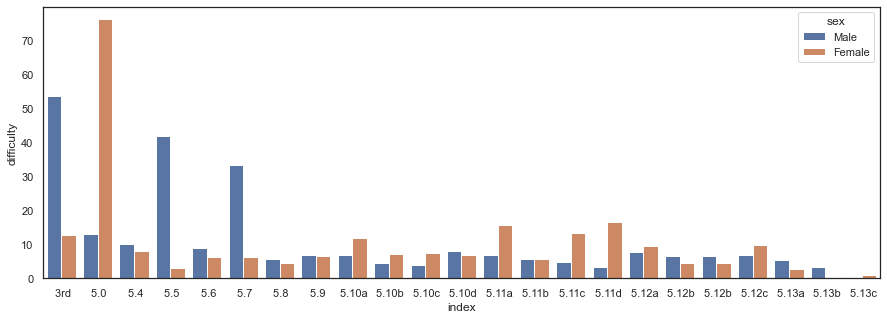

In [468]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="difficulty", hue="sex", data=combined_df,
    order = [' 3rd', ' 5.0', ' 5.4', ' 5.5', ' 5.6', ' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b', ' 5.12b', 
             ' 5.12c',' 5.13a', ' 5.13b', ' 5.13c'])
ax.grid(False)


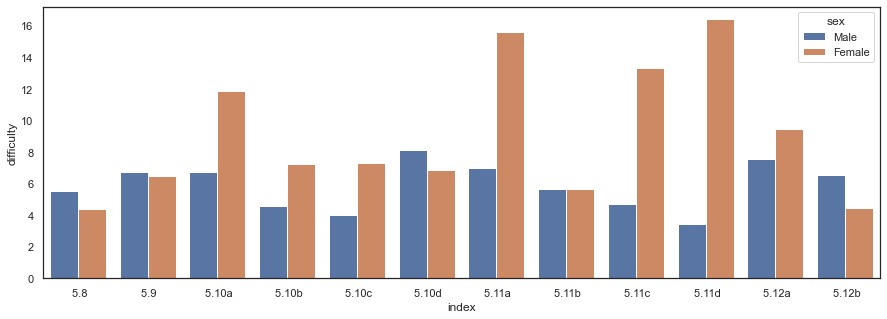

In [474]:
# Removed over 5.12b because fewer than 10 women were represented per grade. 5.7 needs to be inspected for outliers.
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="difficulty", hue="sex", data=combined_df,
    order = [' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b'])
ax.grid(False)


## Plotting number of grades climbed by gender

In [445]:
lead_dict_count_men2 = lead_dict_count_men.copy()
lead_dict_count_women2 = lead_dict_count_women.copy()

In [446]:
# Turn women values into strings
for k, v in lead_dict_count_women2.items():
    lead_dict_count_women2[k] = str(v)

# Turn men values into strings
for k, v in lead_dict_count_men2.items():
    lead_dict_count_men2[k] = str(v) 

In [447]:
# Turn the women values into lists (to allow for extension when combining dictionaries).
lead_dict_count_women2_list = {}
key_list = list(lead_dict_count_women2.keys())
val_list = list(lead_dict_count_women2.values())

for index in range(len(lead_dict_count_women2)):
    lead_dict_count_women2_list[key_list[index]] = [val_list[index]]
    
# Turn the men values into lists (to allow for extension when combining dictionaries).
lead_dict_count_men2_list = {}
key_list = list(lead_dict_count_men2.keys())
val_list = list(lead_dict_count_men2.values())

for index in range(len(lead_dict_count_men2)):
    lead_dict_count_men2_list[key_list[index]] = [val_list[index]]

In [448]:
lead_dict_count_women2_list

{' 5.10b': ['36'],
 ' 5.12c': ['6'],
 ' 3rd': ['15'],
 ' 5.9': ['77'],
 ' 5.10c': ['35'],
 ' 5.10a': ['62'],
 ' 5.11a': ['41'],
 ' 5.11c': ['19'],
 ' 5.13a': ['6'],
 ' 5.12a': ['25'],
 ' 5.12b': ['13'],
 ' 5.10d': ['21'],
 ' 5.11b': ['23'],
 ' 5.7': ['22'],
 ' 5.8': ['38'],
 ' 5.12d': ['2'],
 ' 5.11d': ['10'],
 ' 5.4': ['1'],
 ' 5.0': ['1'],
 ' 5.13b': ['2'],
 ' 5.6': ['6'],
 ' 5.5': ['2'],
 ' 5.13c': ['1']}

In [449]:
# Combine male and female dictionaries
for k, v in lead_dict_count_women2_list.items():
    if k in lead_dict_count_men2_list:
        lead_dict_count_men2_list[k].extend(v)
    else:
        lead_dict_count_men2_list[k] = v

In [450]:
# first value represents men. Second represents women.
combined_count_dict = lead_dict_count_men2_list
combined_count_dict

{' 5.11a': ['234', '41'],
 ' 5.12c': ['60', '6'],
 ' 5.13c': ['8', '1'],
 ' 5.12a': ['165', '25'],
 ' 4th': ['6'],
 ' 5.11c': ['124', '19'],
 ' 5.10b': ['139', '36'],
 ' 5.10a': ['214', '62'],
 ' 5.10d': ['141', '21'],
 ' 5.12d': ['28', '2'],
 ' 5.13a': ['50', '6'],
 ' 5.12b': ['73', '13'],
 ' 5.11d': ['84', '10'],
 ' 5.11b': ['99', '23'],
 ' 5.10c': ['123', '35'],
 ' 5.9': ['130', '77'],
 ' 5.7': ['50', '22'],
 ' 5.8': ['75', '38'],
 ' 5.6': ['6', '6'],
 ' 5.0': ['16', '1'],
 ' 3rd': ['42', '15'],
 ' 5.14a': ['4'],
 ' 5.14b': ['1'],
 ' 5.13b': ['16', '2'],
 ' 5.13d': ['1'],
 ' 5.2': ['2'],
 ' 5.14d': ['1'],
 ' 5.4': ['1', '1'],
 ' 5.5': ['3', '2'],
 ' 5.1': ['2'],
 ' 5.3': ['1']}

In [451]:
# Remove keys where there are only women or only men.
keys_to_remove = []
for key in combined_count_dict:
    if len(combined_count_dict[key]) < 2:
        keys_to_remove.append(key)
        
[combined_count_dict.pop(key) for key in keys_to_remove] 

[['6'], ['4'], ['1'], ['1'], ['2'], ['1'], ['2'], ['1']]

In [452]:
combined_count_df = pd.DataFrame.from_dict(combined_count_dict, orient='index', columns = ['Male', 'Female'])

In [453]:
combined_count_df.reset_index(inplace=True)

In [454]:
combined_count_df = pd.melt(combined_count_df, id_vars="index", var_name="sex", value_name="count")

In [457]:
combined_count_df['count'] = pd.to_numeric(combined_count_df['count'], downcast='float')

In [458]:
combined_count_df

,index,sex,count
0,5.11a,Male,234.0
1,5.12c,Male,60.0
2,5.13c,Male,8.0
3,5.12a,Male,165.0
4,5.11c,Male,124.0
5,5.10b,Male,139.0
6,5.10a,Male,214.0
7,5.10d,Male,141.0
8,5.12d,Male,28.0
9,5.13a,Male,50.0


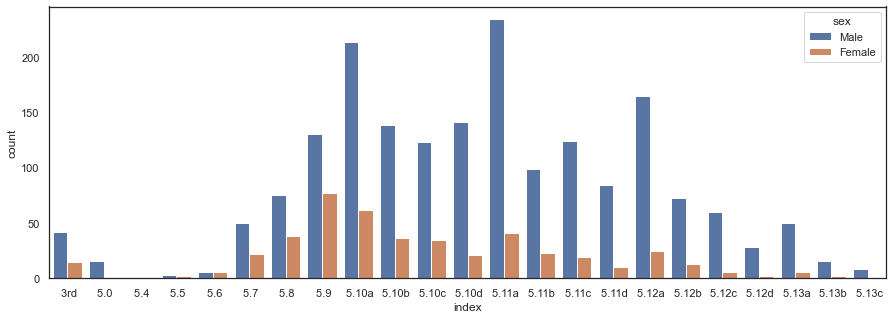

In [466]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="count", hue="sex", data=combined_count_df,
    order = [' 3rd', ' 5.0', ' 5.4', ' 5.5', ' 5.6', ' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b', ' 5.12c',
             ' 5.12d', ' 5.13a', ' 5.13b', ' 5.13c'])
ax.grid(False)

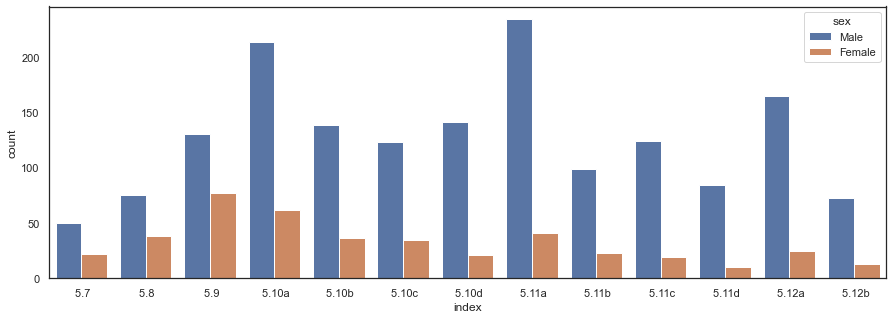

In [472]:
# Cutting off climbs where fewer than 10 women are represented
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="count", hue="sex", data=combined_count_df,
    order = [' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b'])
ax.grid(False)